In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# [The StatQuest Introduction to PyTorch](https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=22)

## Neural Network class
With PyTorch, creating a Neural Network means creating a **new Class**.

Create a class for our Neural Network, say BasicNN
```python
class BasicNN(nn.Module):
    
    def __init__(self):
        super().__init__() # calls the initialization method of the parent class i.e Module
        pass
    
    def forward(self):
        pass
```

In the above neural network "BasicNN" we have two methods **`init`** and **forward`** :
* **`init method` :** creates and initializes the **weights** and **biases**.
* **`forward method` :** does a **forward pass** through the Neural Network "BasicNN" by taking an input value and calculating the output value with the **weights, biases** & **activation functions.**

input : tensor([ 0.0000,  1.1000,  2.2000,  3.3000,  4.4000,  5.5000,  6.6000,  7.7000,
         8.8000,  9.9000, 11.0000])

Finished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. 

output : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


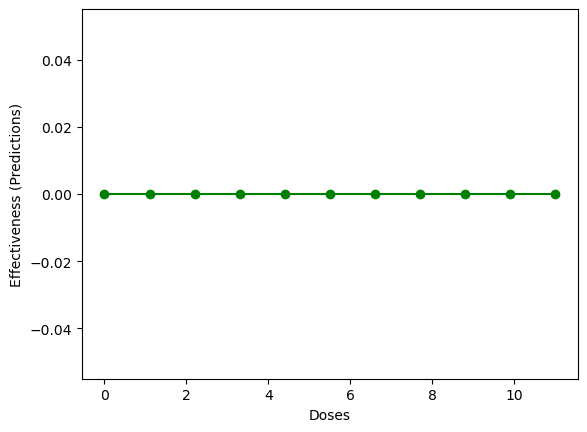

In [2]:
# Import Modules
import torch # to create tensors and store values
import torch.nn as nn # to make the weights & bias tensors part of the Neural Network
import torch.nn.functional as F # gives us the Activation Functions
from torch.optim import SGD # optimizer to fit the Neural Network to the Data

# To draw nice looking graphs
import matplotlib.pyplot as plt

# The Neural Network (BasicNN) inherits from a PyTorch class called Module
class BasicNN(nn.Module):
    def __init__(self): # initialization method for our new class i.e BasicNN
        super().__init__() # calls the initialization method of the parent class i.e Module
        
        ### initialize the weights & biases in our Neural Network ###
        # the first weight w00
        ### making this weight a Parameter for the Neural Network, gives us the option to optimize it ###
        self.w00 = nn.Parameter(data=torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data=torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data=torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data=torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data=torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data=torch.tensor(2.70), requires_grad=False)
        
        self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        
        print("\nFinished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. \n")
        
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, input):
        ### Now the first thing we want to do is connect the Input to the Activation Function
        # (y = input * weight + b)
        input_to_top_relu = input * self.w00 + self.b00 
        # Pass the input_to_top_relu to the Activation Function
        top_relu_output = F.relu(input_to_top_relu)
        # Now scale the top_relu_output by the weight w01
        scaled_top_relu_output = top_relu_output * self.w01
        
        ### Now do the same for the Bottom
        # (y = input * weight + b)
        input_to_bottom_relu = input * self.w10 + self.b10
        # Pass the input_to_bottom_relu to the activation function
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ### Now add the top and bottom scaled values to the final bias
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        ### Now pass the final dot product "input_to_final_relu" to the Activation Function to get the Final Output
        # Final Output
        output = F.relu(input_to_final_relu)
        
        return output
    
input_doses = torch.linspace(start = 0, end = 11, steps = 11)
print(f"input : {input_doses}")
### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicNN()

output = model(input_doses)
print(f"output : {output}")

plt.plot(input_doses, output, color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

## Train Neural Network with Backpropagation
Let's optimize the final bias with Backpropagation.

```python
class BasicNN_train(nn.Module):
    
    def __init__(self):
        super().__init__() # calls the initialization method of the parent class i.e Module  
        ...
        # before
        self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # after
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
    
    def forward(self):
        pass
```

* **`requires_grad=True` :** is what tells PyTorch that this parameter should be optimized.

input : tensor([ 0.0000,  1.1000,  2.2000,  3.3000,  4.4000,  5.5000,  6.6000,  7.7000,
         8.8000,  9.9000, 11.0000])

Finished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. 

output : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<ReluBackward0>)


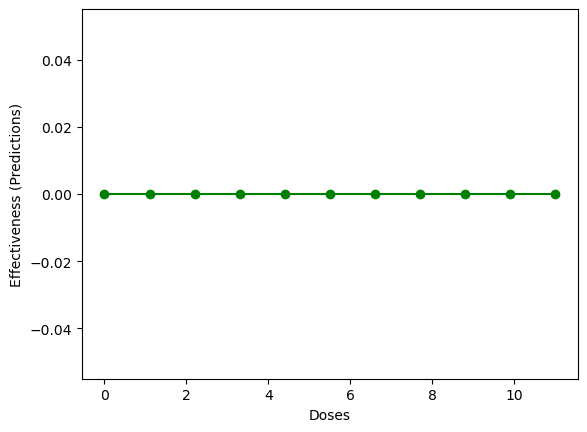

In [3]:
# Import Modules
import torch # to create tensors and store values
import torch.nn as nn # to make the weights & bias tensors part of the Neural Network
import torch.nn.functional as F # gives us the Activation Functions
from torch.optim import SGD # optimizer to fit the Neural Network to the Data

# To draw nice looking graphs
import matplotlib.pyplot as plt

# The Neural Network (BasicNN) inherits from a PyTorch class called Module
class BasicNN_train(nn.Module):
    def __init__(self): # initialization method for our new class i.e BasicNN
        super().__init__() # calls the initialization method of the parent class i.e Module
        
        ### initialize the weights & biases in our Neural Network ###
        # the first weight w00
        ### making this weight a Parameter for the Neural Network, gives us the option to optimize it ###
        self.w00 = nn.Parameter(data=torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(data=torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(data=torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(data=torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(data=torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(data=torch.tensor(2.70), requires_grad=False)
        
        # before
        # self.final_bias = nn.Parameter(data=torch.tensor(-16.0), requires_grad=False)
        # now
        self.final_bias = nn.Parameter(data=torch.tensor(0.0), requires_grad=True)
        
        print("\nFinished!!! creating multiple PyTorch Parameter for each Weights & Bias for our NN. \n")
        
    ### Now we need to connect those PyTorch Parameters with Input, Activation Function & Output
    ### In other words, we need a way to "make Forward Pass" through Neural Network that uses the weights & bias
    ### that we have just initialized
    
    def forward(self, input):
        ### Now the first thing we want to do is connect the Input to the Activation Function
        # (y = input * weight + b)
        input_to_top_relu = input * self.w00 + self.b00 
        # Pass the input_to_top_relu to the Activation Function
        top_relu_output = F.relu(input_to_top_relu)
        # Now scale the top_relu_output by the weight w01
        scaled_top_relu_output = top_relu_output * self.w01
        
        ### Now do the same for the Bottom
        # (y = input * weight + b)
        input_to_bottom_relu = input * self.w10 + self.b10
        # Pass the input_to_bottom_relu to the activation function
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ### Now add the top and bottom scaled values to the final bias
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        ### Now pass the final dot product "input_to_final_relu" to the Activation Function to get the Final Output
        # Final Output
        output = F.relu(input_to_final_relu)
        
        return output
    
input_doses = torch.linspace(start = 0, end = 11, steps = 11)
print(f"input : {input_doses}")
### Now, the idea is to pass these input_doses through our Neural Network "BasicNN"
model = BasicNN_train()

output = model(input_doses)
print(f"output : {output}")

### output.detach() to create a new tensor that only has the values because the "final_bias" now has a gradient
plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

### Training the Neural Network
**Aim:** our current `final_bias = 0.0`, we want to train the Neural Network "BasicNN_train" and find the optim value for the `final_bias`.
```python
optimizer = SGD(params=model.parameters(), lr = 0.1)
```
* **Note:** The optimizer object **SGD (Stochastic Gradient Descent)**, will optmize every **Parameter** that we set **`requires_grad=True`**.

Final bias, before optimization : 0.0
Epoch : 0, Final Bias : -3.202000141143799
Epoch : 1, Final Bias : -5.7636003494262695
Epoch : 2, Final Bias : -7.812880516052246
Epoch : 3, Final Bias : -9.45230484008789
Epoch : 4, Final Bias : -10.763843536376953
Epoch : 5, Final Bias : -11.813075065612793
Epoch : 6, Final Bias : -12.652460098266602
Epoch : 7, Final Bias : -13.323967933654785
Epoch : 8, Final Bias : -13.861174583435059
Epoch : 9, Final Bias : -14.290939331054688
Epoch : 10, Final Bias : -14.634751319885254
Epoch : 11, Final Bias : -14.909801483154297
Epoch : 12, Final Bias : -15.129840850830078
Epoch : 13, Final Bias : -15.305872917175293
Epoch : 14, Final Bias : -15.446698188781738
Epoch : 15, Final Bias : -15.559358596801758
Epoch : 16, Final Bias : -15.649486541748047
Epoch : 17, Final Bias : -15.721589088439941
Epoch : 18, Final Bias : -15.779271125793457
Epoch : 19, Final Bias : -15.825416564941406
Epoch : 20, Final Bias : -15.862333297729492
Epoch : 21, Final Bias : -15.89

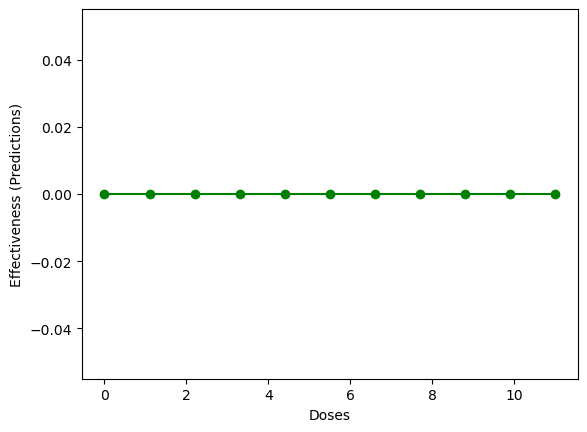

In [4]:
# Training Data
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

# The first thing we do is create an optimizer object, that will use SGD to optimize the "final_bias".
optimizer = SGD(params=model.parameters(), lr = 0.1)
print(f"Final bias, before optimization : {model.final_bias.data}")

### The Loop that will Do Gradient Descent
for epoch in range(100):
    total_loss = 0
    
    ### Now the Nested For Loop, runs each training data point through the Model and calculates the "total_loss"
    for iteration in range(len(inputs)):
        inputs_i = inputs[iteration]
        labels_i = labels[iteration]
        
        # Prediction
        outputs_i = model(inputs_i)
        loss = (labels_i - outputs_i) ** 2
        
        ### backpropagation (loss.backward)): to calculate the derivative of the loss function wrt the parameters we want to optimize
        ### also it accumulates the derivates each time we go through the nested loop for each training data
        loss.backward()
        
        ### as total_loss does not automatically accumulate, so
        total_loss += float(loss)
        
    if (total_loss < 0.0001):
        print(f"Epoch: {epoch}")
        print("The Model has optimally fitted to the training data!!!")
        break
    
    ### if total_loss is not small, then we take a small step towards a better value for "final_bias" using optimizer.step()
    ### just like loss.backward() has access to the derivatives in the model, similarly, optimizer.step() also has the access and
    ### can use them to step in the correct direction
    optimizer.step()
    
    ### Zero out or empty the derivatives that we are storing in the model
    optimizer.zero_grad()
    
    print(f"Epoch : {epoch}, Final Bias : {model.final_bias.data}")
    
print(f"After Optimization, Final Bias : {model.final_bias.data}, Final Loss : {total_loss}")

### Plot
### output.detach() to create a new tensor that only has the values because the "final_bias" now has a gradient
plt.plot(input_doses, output.detach(), color = "g", marker = "o")
plt.xlabel("Doses")
plt.ylabel("Effectiveness (Predictions)")
plt.show()

# [StatQuest introduction to coding Neural Networks with PyTorch + Lightning](https://youtu.be/khMzi6xPbuM?si=yqO_23MltiPK9Ztb)

In [5]:
# Import Modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

# PyTorch Lightning Module
! pip3 install lightning
import lightning as L
from torch.utils.data import TensorDataset,DataLoader

# Plotting Module
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l